# Подключение используемых библиотек и загрузка данных

## Подключение библиотек

In [ ]:
# preprocessing 
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# visualization 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# datasets, classifiers and performance metrics
from sklearn import datasets, metrics, decomposition
from sklearn.metrics import confusion_matrix, RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb

from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
from imblearn.over_sampling import SMOTE 

Версии используемых пакетов.

In [ ]:
for package in [np, pd, sns]:
    print(package.__name__, 'version:', package.__version__)

numpy version: 1.21.6
pandas version: 1.3.5
seaborn version: 0.11.2


## Загрузка данных

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Training/students_adaptability_level_online_education.csv')

# Анализ исходных данных. Визуализация.

Отобразим первые пять строк загруженных данных

In [ ]:
df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


Получим информацию о типе данных, размерности датасета

In [ ]:
df.info()
print()
print('Размерность данных: количество строк - {0}, количество колонок - {1}.'.format(df.shape[0], df.shape[1]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB

Размерность данных: количество строк - 1205, количество колонок -

Все столбцы имеют строковый тип данных, который указывает, что присутствуют только категориальные признаки.

Проверим наличие пропусков

In [ ]:
print(df.isnull().sum())
if df.isnull().sum().sum()==0:
  print()
  print('Пропусков нет')

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64

Пропусков нет


Визуализация наличия пропусков

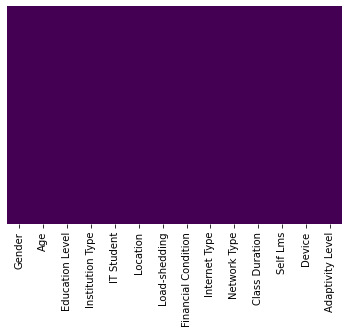

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Посмотрим статистику по датасету

In [ ]:
df.describe().T

,count,unique,top,freq
Gender,1205,2,Boy,663
Age,1205,6,21-25,374
Education Level,1205,3,School,530
Institution Type,1205,2,Non Government,823
IT Student,1205,2,No,901
Location,1205,2,Yes,935
Load-shedding,1205,2,Low,1004
Financial Condition,1205,3,Mid,878
Internet Type,1205,2,Mobile Data,695
Network Type,1205,3,4G,775


In [ ]:
df.columns

Index(['Gender', 'Age', 'Education Level', 'Institution Type', 'IT Student',
       'Location', 'Load-shedding', 'Financial Condition', 'Internet Type',
       'Network Type', 'Class Duration', 'Self Lms', 'Device',
       'Adaptivity Level'],
      dtype='object')

## Выполним анализ данных с построения общего распределения признаков по их количеству.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

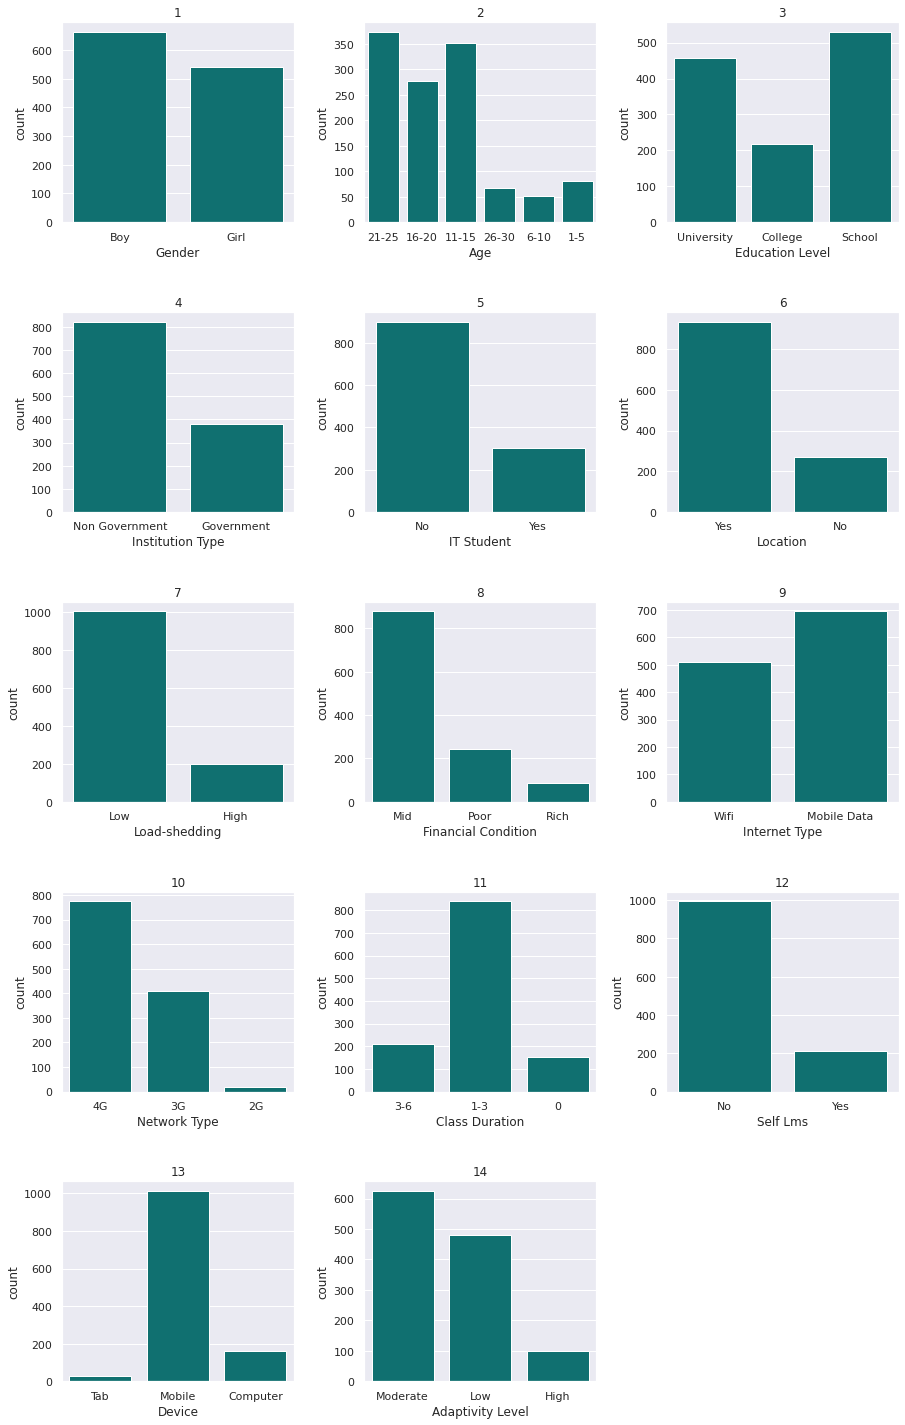

In [ ]:
plt.figure(figsize = (15,25))
plt.subplots_adjust(wspace=0.3, hspace=0.45)
for i in range(len(list(df))):
  plt.subplot(5, 3, i+1)
  sns.countplot(df[list(df)[i]], color ='teal')
  plt.title(i+1)


## Выводы
1.   Учащиеся распределены по половому признаку равномерно.
2.   Наибольшее количество учеников находится в возрасном диапазоне 11-25 лет именно в этом возрасте можно уверенно говорить об устойчивой адаптации к обучению.
3.   Большая часть учащихся имеет школьное образование, что коррелирует с распределение учеников по возрастам.
4.   Количество учащихся в негосударственных учебных заведений выше в два раза, чем в государственных.
5.   Преобладают обучающиеся на IT специальности.
6.   Большинство учащихся из семей со средним достатком, что можно связать с преобладанием негосударственных учебных заведений.
7.   Обучение происходит преимущественно с мобильных устройств, по сети 4G.








## Посмотрим, как распределяется уровень адаптации в зависимости от различных параметров.

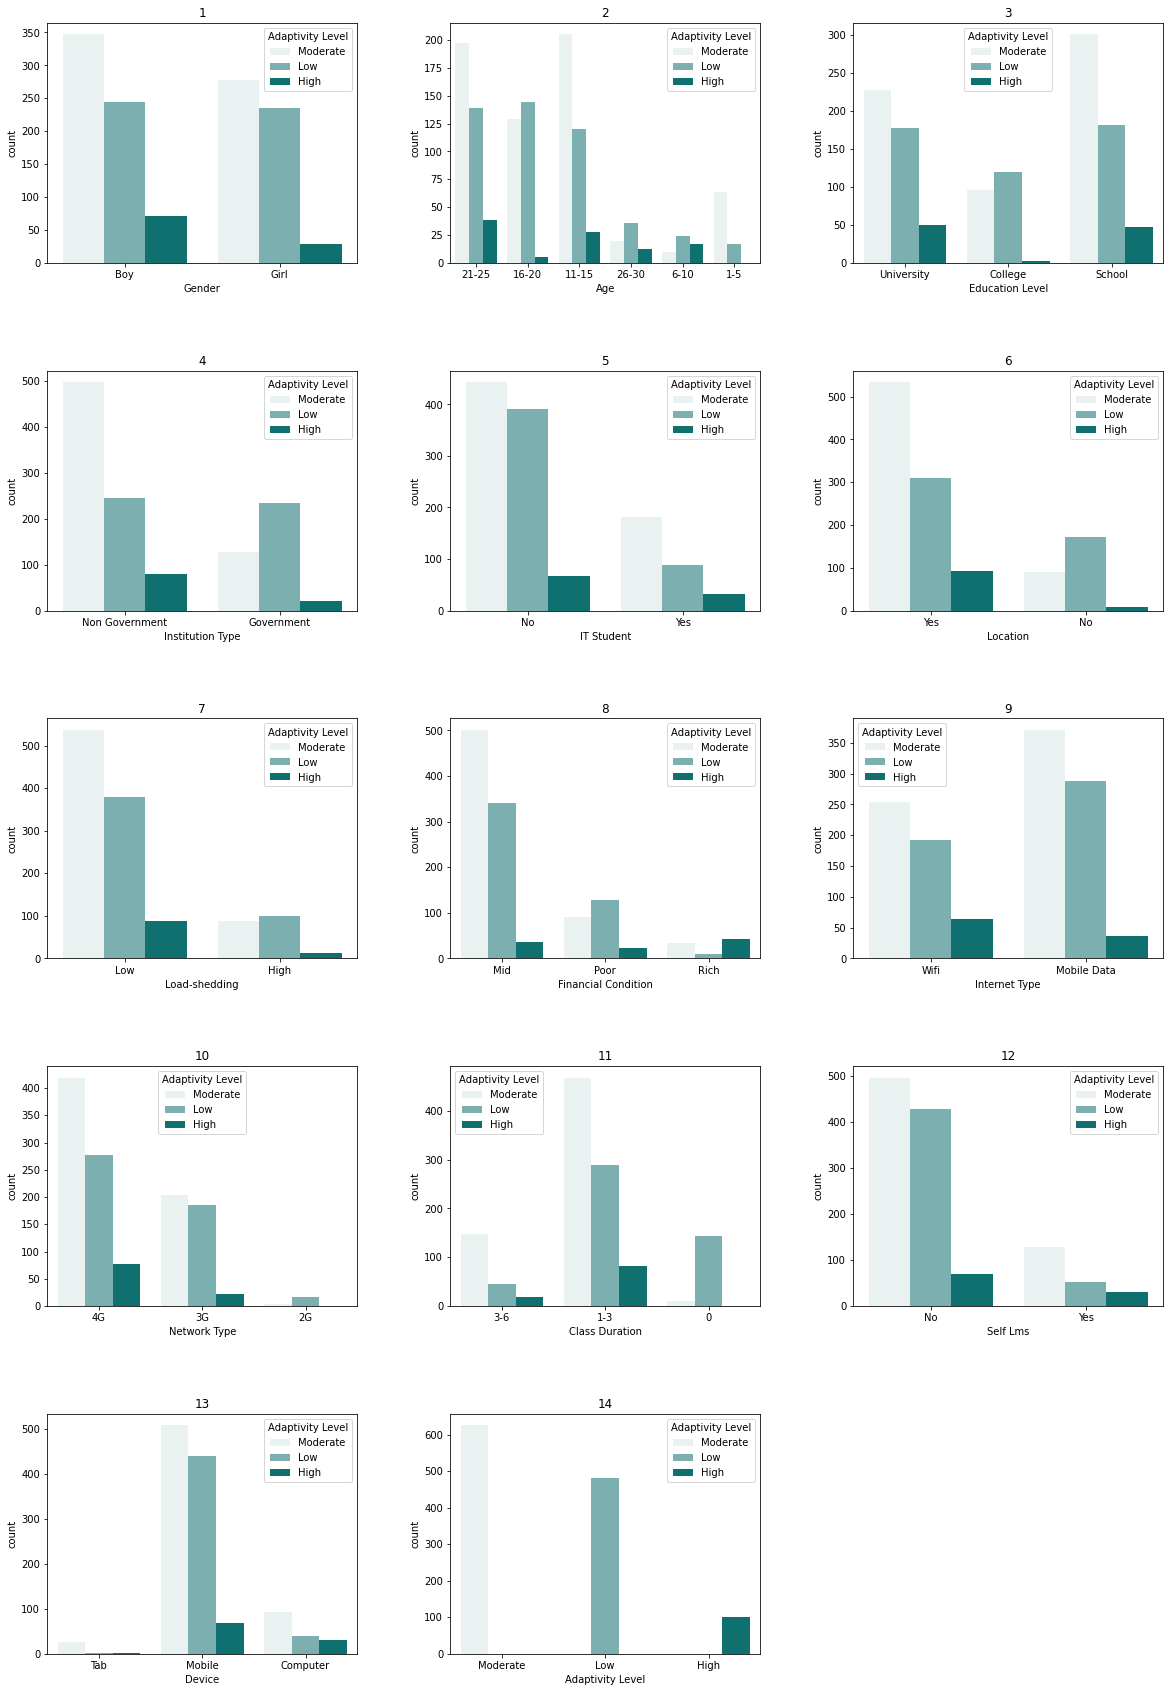

In [ ]:
plt.figure(figsize = (20,30))
plt.subplots_adjust(wspace=0.3, hspace=0.45)
for i in range(len(list(df))):
  plt.subplot(5, 3, i+1)
  sns.countplot(x=df[list(df)[i]], hue='Adaptivity Level', data = df, color ='teal')
  plt.title(i+1)

Выводы
1.   Мужчины адаптируются немного лучше женщин, однако уровень низкой адаптации у обеих групп одинаковый.
2.   Лучше всего адаптация происходит у учащихся в возрасте 21-25 и 11-15 лет, хуже всего улюдей в возрасте 26-30 и 16-20. Это можно объяснить повышенной социальной нагрузкой (работа, семья и т.д.) у людей в возрасте 26-30, и меньшей мотивацией и психологической устойчивости людей в возрасте 16-20.
3.   Результат адаптации зависит от качества интернета, 4G показывает наилучший показатель.


# Построение моделей

## Кодирование значений. Увеличение датасета.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
scaler = OrdinalEncoder()
names = df.columns
d = scaler.fit_transform(df)

scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()


,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,0.0,3.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0,2.0,0.0,2.0,2.0
1,1.0,3.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,2.0
2,1.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0,1.0,0.0,1.0,2.0
3,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0,1.0,2.0
4,1.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0


Так как датасет несбалансирован (мало примеров для класса Adaptivity Level - Hight), требуется воспользоватья техникой передискретизации синтетического меньшиства (увеличить количество примеров)

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
features, labels=  oversample.fit_resample(scaled_df.drop(["Adaptivity Level"],axis=1),scaled_df["Adaptivity Level"])
features

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device
0,0.0,3.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0,2.0,0.0,2.000000
1,1.0,3.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,1.000000
2,1.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0,1.0,0.0,1.000000
3,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0,1.000000
4,1.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1870,1.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,1.0,0.0,1.000000
1871,1.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0,1.0,0.0,0.649276
1872,0.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.000000
1873,1.0,3.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0,1.000000


Теперь количество строк равно 1875 (вместо 1205).

## Разделение данных на обучающую и тестовую выборки.

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(features, labels, test_size=0.35,random_state=42)

In [ ]:
models = [RandomForestClassifier(), KNeighborsClassifier(), SVC(), LogisticRegression(),xgb.XGBClassifier()]
scores = dict()

for m in models:
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)

    print(f'model: {str(m)}')
    print(classification_report(y_test,y_pred, zero_division=1))
    print('-'*60, '\n')

model: RandomForestClassifier()
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95       231
         1.0       0.93      0.93      0.93       218
         2.0       0.92      0.85      0.89       208

    accuracy                           0.92       657
   macro avg       0.92      0.92      0.92       657
weighted avg       0.92      0.92      0.92       657

------------------------------------------------------------ 

model: KNeighborsClassifier()
              precision    recall  f1-score   support

         0.0       0.85      0.97      0.91       231
         1.0       0.85      0.87      0.86       218
         2.0       0.85      0.70      0.77       208

    accuracy                           0.85       657
   macro avg       0.85      0.85      0.85       657
weighted avg       0.85      0.85      0.85       657

------------------------------------------------------------ 

model: SVC()
              precision    recall  f1

Лучше всего себя показал RandomForestClassifier

In [ ]:
model=RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred, zero_division=1))

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95       231
         1.0       0.92      0.91      0.92       218
         2.0       0.91      0.85      0.88       208

    accuracy                           0.92       657
   macro avg       0.92      0.92      0.92       657
weighted avg       0.92      0.92      0.92       657



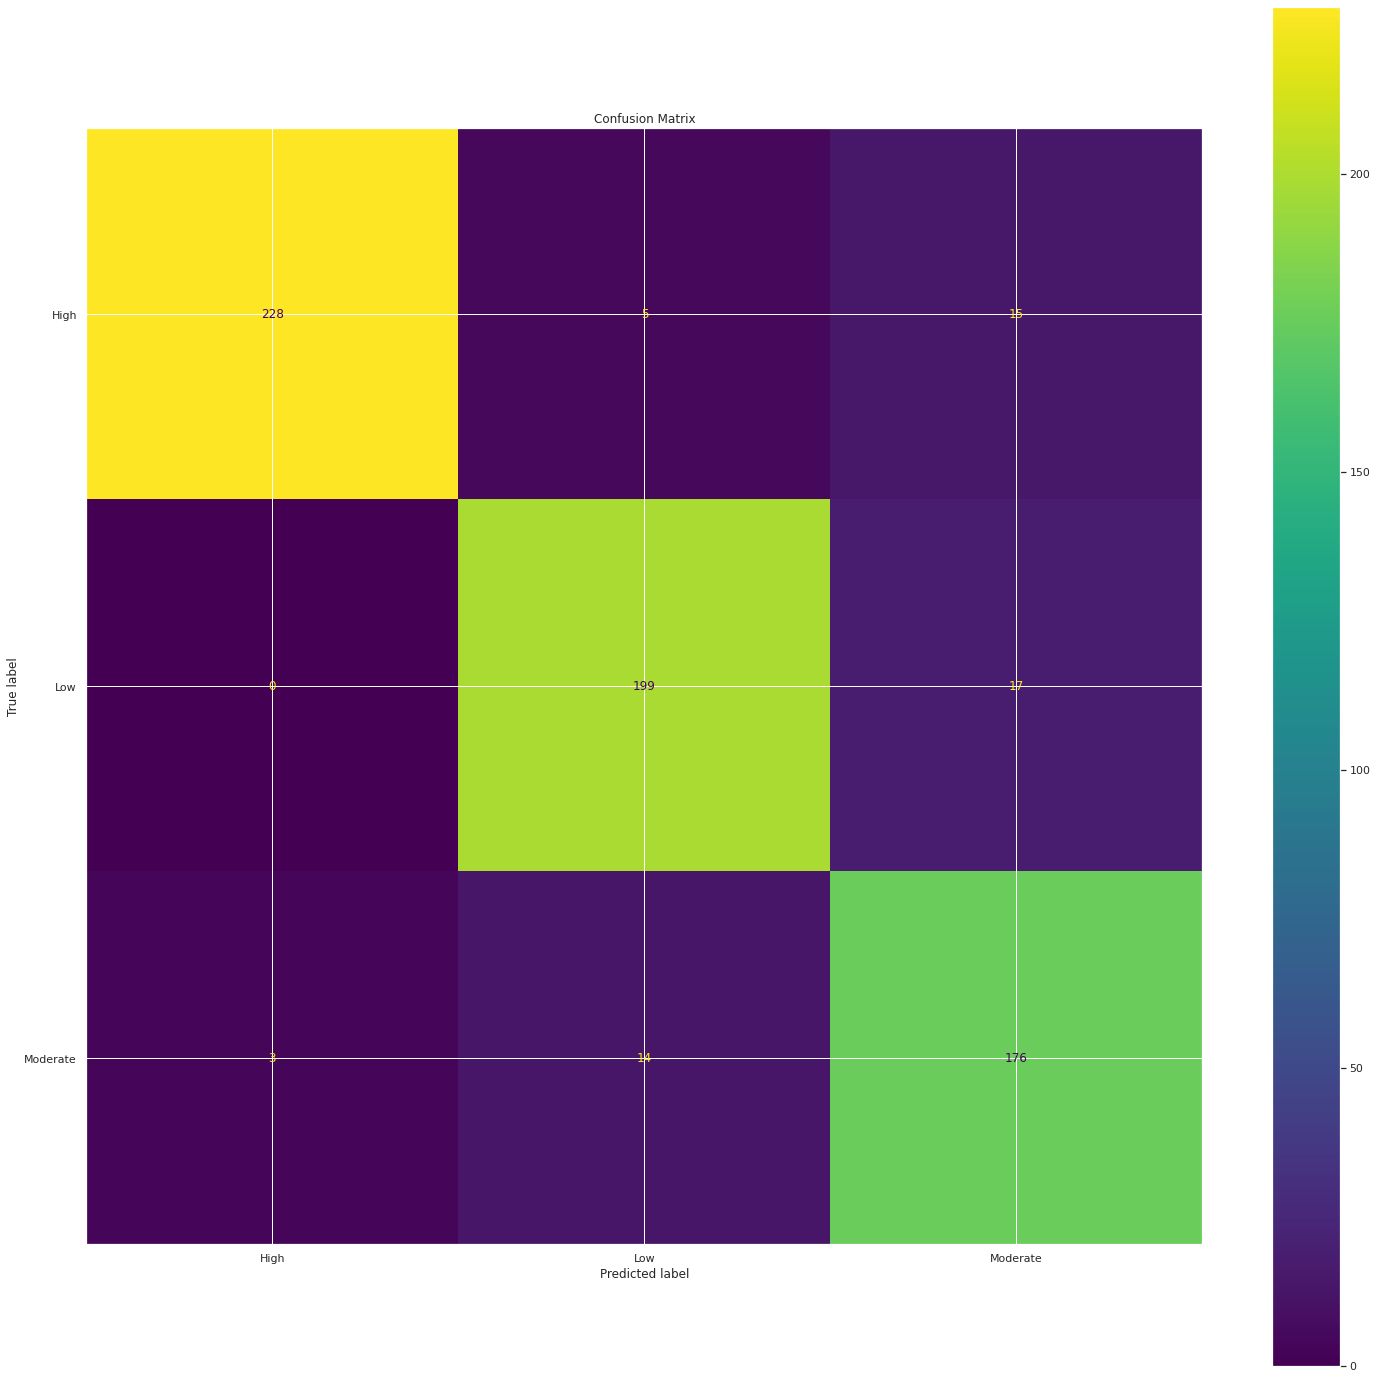

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(model.predict(X_test),y_test)
disp = ConfusionMatrixDisplay(cm, display_labels=["High","Low","Moderate"])
disp.plot()
plt.title("Confusion Matrix")
plt.show()

Посмотрим веса

In [ ]:
feature_importances=model.feature_importances_
feature_importances_df=pd.DataFrame({'features':list(X_train), 'feature_importances':feature_importances})
feature_importances_df=pd.DataFrame({'features':list(X_train), 'feature_importances':feature_importances})
feature_importances_df.sort_values('feature_importances',ascending=False)

,features,feature_importances
7,Financial Condition,0.165753
1,Age,0.133372
10,Class Duration,0.126176
0,Gender,0.088668
9,Network Type,0.071554
3,Institution Type,0.066025
5,Location,0.061771
2,Education Level,0.057634
8,Internet Type,0.057428
11,Self Lms,0.046456


Таким образом, наиболее весомыми параметрами, влияющими на уровень адаптации  оказались:
	

1.   Financial Condition 
2.   Age
3.   Class Duration 	


